In [1]:
from libraries import *
from my_functions import *

In [2]:
dataframe=load_data()


[INFO] Loading data


In [43]:
fold1_index=np.load("../../fold1.npy")
fold4_index=np.load("../../fold4.npy")
train_index=np.load("../../train_index.npy")
mask = np.isin(train_index, fold1_index)
train_fold1=train_index[~mask]
mask = np.isin(train_index, fold4_index)
train_fold4=train_index[~mask]

#MODEL 4
print(colored("[INFO]", "cyan"),"generating data for model 4")
images = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
rounds_used=4
model = keras.models.load_model('../Model9_r4_fold1')
images=prepare_test(dataframe, images, test_index, 4, rounds_used, 150, False)
threshold=0.5
x_test, y_test4=prepare_dataset_1(images, rounds_used)
auc, fpr, tpr, thresholds, loss, preds4=evaluate_model(x_test, y_test4, model, threshold)


#MOLEL 3
print(colored("[INFO]", "cyan"),"generating data for model 3")
images = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
rounds_used=3
model = keras.models.load_model('../Model9_r3_fold1')
images=prepare_test(dataframe, images, test_index, 4, rounds_used, 150, False)
threshold=0.6
x_test, y_test3=prepare_dataset_1(images, rounds_used)
auc, fpr, tpr, thresholds, loss, preds3=evaluate_model(x_test, y_test3, model, threshold)


#MOLEL 2
print(colored("[INFO]", "cyan"),"generating data for model 2")
images = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
rounds_used=2
model = keras.models.load_model('../Model9_r2_fold1')
images=prepare_test(dataframe, images, test_index, 4, rounds_used, 150, False)
threshold=0.7
x_test, y_test2=prepare_dataset_1(images, rounds_used)
auc, fpr, tpr, thresholds, loss, preds2=evaluate_model(x_test, y_test2, model, threshold)



#MOLEL 1
print(colored("[INFO]", "cyan"),"generating data for model 1")
images = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
rounds_used=1
model = keras.models.load_model('../../approach15/Model9_r1_fold4')
images=prepare_test(dataframe, images, test_index, 4, rounds_used, 150, False)
threshold=0.25
x_test, y_test1=prepare_dataset_1(images, rounds_used)
auc, fpr, tpr, thresholds, loss, preds1=evaluate_model(x_test, y_test1, model, threshold)


[INFO] generating data for model 4
4/4 [==============================] - 0s 38ms/step - loss: 0.0149
[METRICS] Loss:  0.014891527593135834
[METRICS] ROC AUC=0.939
[INFO] generating data for model 3
4/4 [==============================] - 0s 38ms/step - loss: 0.0131
[METRICS] Loss:  0.013062580488622189
[METRICS] ROC AUC=0.940
[INFO] generating data for model 2
4/4 [==============================] - 0s 35ms/step - loss: 0.0109
[METRICS] Loss:  0.010930775664746761
[METRICS] ROC AUC=0.869
[INFO] generating data for model 1
4/4 [==============================] - 0s 22ms/step - loss: 0.0169
[METRICS] Loss:  0.016856784000992775
[METRICS] ROC AUC=0.712


# PROGRESSIVE DISCARD

In [44]:
#PROGRESSIVE DISCARD
opt_thr4=0.614
opt_thr3=0.708
opt_thr2=0.762
opt_thr1=0.209
colors=np.asarray([0]*len(test_index))


#DISCARD ROUND 1
print(colored("[INFO]", "magenta"),"discarding cells round 1")
disc_r1=preds1<opt_thr1
colors[disc_r1[:,0]]=1
print(colors)


#DISCARD ROUND 2
print(colored("[INFO]", "magenta"),"discarding cells round 2")
disc_r2=preds2<opt_thr2
disc_r2=disc_r2[:,0]
for i in range(len(disc_r2)):
    if disc_r2[i]==True:
        if disc_r1[i]==False:
               colors[i]=2
print(colors)

#DISCARD ROUND 3
print(colored("[INFO]", "magenta"),"discarding cells round 3")
disc_r3=preds3<opt_thr3
disc_r3=disc_r3[:,0]
for i in range(len(disc_r3)):
    if disc_r3[i]==True:
        if disc_r2[i]==False:
            if disc_r1[i]==False:
                   colors[i]=3
print(colors)

#DISCARD ROUND 4
print(colored("[INFO]", "magenta"),"discarding cells round 3")
disc_r4=preds4<opt_thr4
disc_r4=disc_r4[:,0]
for i in range(len(disc_r4)):
    if disc_r4[i]==True:
        if disc_r3[i]==False:
            if disc_r2[i]==False:
                if disc_r1[i]==False:
                       colors[i]=4
print(colors)

[INFO] discarding cells round 1
[1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 1 1 0 1 0 0 0 0]
[INFO] discarding cells round 2
[1 0 1 0 0 2 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 2 1 0 2
 1 2 1 1 1 1 1 1 0 2 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 1 1 0 1 0 0 2 0]
[INFO] discarding cells round 3
[1 0 1 0 0 2 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 2 1 0 2
 1 2 1 1 1 1 1 1 0 2 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 1 1 0 1 0 0 2 0]
[INFO] discarding cells round 3
[1 4 1 0 0 2 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 2 1 0 2
 1 2 1 1 1 1 1 1 0 2 1 1 1 1 1 2

In [45]:
group=np.array(['remaining' for _ in range(len(test_index))])
group[colors==1]="round 1"
group[colors==2]="round 2"
group[colors==3]="round 3"
group[colors==4]="round 4"
print(group)

['round 1' 'round 4' 'round 1' 'remaining' 'remaining' 'round 2' 'round 1'
 'remaining' 'round 1' 'remaining' 'round 1' 'round 1' 'round 1' 'round 1'
 'round 1' 'round 1' 'remaining' 'round 1' 'round 1' 'round 1' 'round 1'
 'round 1' 'round 1' 'round 1' 'round 1' 'round 1' 'round 2' 'round 1'
 'round 1' 'round 1' 'remaining' 'round 1' 'round 1' 'round 2' 'round 1'
 'remaining' 'round 2' 'round 1' 'round 2' 'round 1' 'round 1' 'round 1'
 'round 1' 'round 1' 'round 1' 'remaining' 'round 2' 'round 1' 'round 1'
 'round 1' 'round 1' 'round 1' 'round 2' 'round 2' 'round 2' 'round 1'
 'round 2' 'round 1' 'round 1' 'round 1' 'round 1' 'round 1' 'round 1'
 'remaining' 'remaining' 'remaining' 'remaining' 'remaining' 'remaining'
 'remaining' 'remaining' 'remaining' 'remaining' 'remaining' 'round 1'
 'round 1' 'round 2' 'round 2' 'round 1' 'round 1' 'round 1' 'round 1'
 'remaining' 'remaining' 'remaining' 'remaining' 'remaining' 'remaining'
 'remaining' 'remaining' 'remaining' 'remaining' 'round 3

[INFO] plotting results ... 

<module 'matplotlib.pylab' from '/home/amarti/anaconda3/envs/tf2/lib/python3.8/site-packages/matplotlib/pylab.py'>

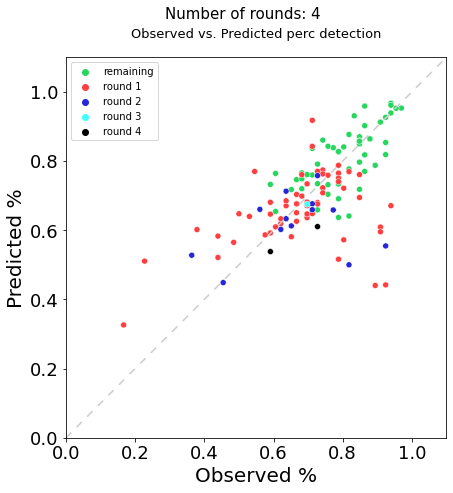

In [55]:
# progressive discard plot
images["group"]=group
images["preds"]=preds4[:,0]
images["y_test"]=y_test4
images=images.sort_values(by='group', ascending=True)
images.head()
colors = ["#26D65E", "#FF3F3F", "#2626D6" , "#3FFFFC" , "#000000"]
scatter_plot(images["preds"], images["y_test"], images, 4, colors)

In [41]:
# Create an array with the colors you want to use

def scatter_plot(preds, observed, dataframe, use_round, colors):
    print(colored("[INFO]", "cyan"), "plotting results ...", end=" ")
    fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
    fig.set_figheight(7)
    fig.set_figwidth(15)

    fig.suptitle('Number of rounds: '+str(use_round), fontsize=15)
    
    cmap=sns.color_palette("tab10", 2)
    #cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    ax1.set_aspect('equal')
    sns.scatterplot(x=np.array(observed), y=np.array(preds),
                    cmap= sns.set_palette(sns.color_palette(colors)), 
                    hue=dataframe["group"].tolist()
                   )


    ax1.set_title("Observed vs. Predicted perc detection",
                    fontsize=13, pad=20)

    ax1.set_ylabel("Predicted %",
                     fontsize=20)

    ax1.set_xlabel('Observed %',
                     fontsize=20)

    ax1.tick_params(labelsize=18)

    lims = [0, 1.1]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _=ax1.plot(lims,lims, '--', color="0.8", dashes=(5, 5))
    #plt.savefig(approach+result_model_name)
    return plt

[INFO] discarding cells round 2
[2 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 2 2 0 2 2 0 2 0 2 0 2 2 0 2 0 2 2 0 2
 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 2 0]
[INFO] discarding cells round 3
[2 0 0 0 0 2 0 0 0 0 0 2 3 2 0 0 0 0 2 2 0 2 2 0 2 0 2 3 2 2 0 2 0 2 2 0 2
 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 3 2 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 0 0 0 0 2 0]
[INFO] discarding cells round 3
[2 4 0 0 0 2 0 0 0 0 0 2 3 2 0 0 0 0 2 2 0 2 2 0 2 0 2 3 2 2 0 2 0 2 2 0 2
 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 3 2 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 3
 0 0 0 0 0 0 0 2 4 0 0 0 2 0]
['round 2' 'round 4' 'remaining' 'remaining' 'remaining' 'round 2'
 'remaining' 'remaining' 'remaining' 'remaining' 'remaining' 'round 2'
 

<module 'matplotlib.pylab' from '/home/amarti/anaconda3/envs/tf2/lib/python3.8/site-packages/matplotlib/pylab.py'>

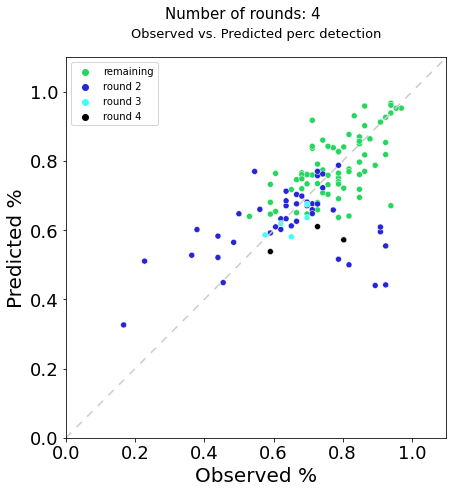

In [59]:
#PROGRESSIVE DISCARD
opt_thr4=0.614
opt_thr3=0.708
opt_thr2=0.762
opt_thr1=0.209
colors=np.asarray([0]*len(test_index))


#DISCARD ROUND 2
print(colored("[INFO]", "magenta"),"discarding cells round 2")
disc_r2=preds2<opt_thr2
disc_r2=disc_r2[:,0]
for i in range(len(disc_r2)):
    if disc_r2[i]==True:
            colors[i]=2
print(colors)

#DISCARD ROUND 3
print(colored("[INFO]", "magenta"),"discarding cells round 3")
disc_r3=preds3<opt_thr3
disc_r3=disc_r3[:,0]
for i in range(len(disc_r3)):
    if disc_r3[i]==True:
        if disc_r2[i]==False:
                colors[i]=3
print(colors)

#DISCARD ROUND 4
print(colored("[INFO]", "magenta"),"discarding cells round 3")
disc_r4=preds4<opt_thr4
disc_r4=disc_r4[:,0]
for i in range(len(disc_r4)):
    if disc_r4[i]==True:
        if disc_r3[i]==False:
            if disc_r2[i]==False:
                    colors[i]=4
print(colors)
group=np.array(['remaining' for _ in range(len(test_index))])
group[colors==2]="round 2"
group[colors==3]="round 3"
group[colors==4]="round 4"
print(group)

# progressive discard plot
images["group"]=group
images["preds"]=preds4[:,0]
images["y_test"]=y_test4
colors = ["#26D65E", "#2626D6" , "#3FFFFC" , "#000000"]
images=images.sort_values(by='group', ascending=True)
images.head()
scatter_plot(images["preds"], images["y_test"], images, 4, colors)

[INFO] discarding cells round 2
[4 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 4 0 0 0 0 0
 4 0 4 0 0 4 0 0 0 0 0 0 0 0 0 4 0 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 4 4 4 0 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 4 4 0 0 0 4 0]
['round 4' 'round 4' 'remaining' 'remaining' 'remaining' 'remaining'
 'remaining' 'remaining' 'remaining' 'remaining' 'remaining' 'remaining'
 'round 4' 'remaining' 'remaining' 'remaining' 'remaining' 'remaining'
 'remaining' 'remaining' 'remaining' 'remaining' 'remaining' 'remaining'
 'round 4' 'remaining' 'remaining' 'remaining' 'remaining' 'round 4'
 'remaining' 'round 4' 'remaining' 'remaining' 'remaining' 'remaining'
 'remaining' 'round 4' 'remaining' 'round 4' 'remaining' 'remaining'
 'round 4' 'remaining' 'remaining' 'remaining' 'remaining' 'remaining'
 'remaining' 'remaining' 'remaining' 'remaining' 'round 4' 'remaining'
 'round 4' 'round 4' 'round 4' 'remaining' 'remaining' 'remaining'
 'remaini

<module 'matplotlib.pylab' from '/home/amarti/anaconda3/envs/tf2/lib/python3.8/site-packages/matplotlib/pylab.py'>

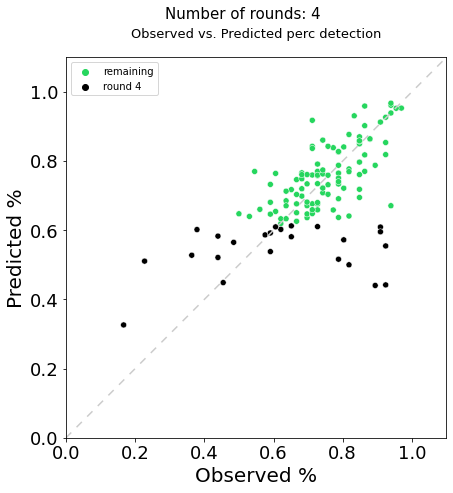

In [62]:
#PROGRESSIVE DISCARD
opt_thr4=0.614
opt_thr3=0.708
opt_thr2=0.762
opt_thr1=0.209
colors=np.asarray([0]*len(test_index))


#DISCARD ROUND 4
print(colored("[INFO]", "magenta"),"discarding cells round 2")
disc_r4=preds4<opt_thr4
disc_r4=disc_r4[:,0]
for i in range(len(disc_r4)):
    if disc_r4[i]==True:
            colors[i]=4

print(colors)
group=np.array(['remaining' for _ in range(len(test_index))])
group[colors==4]="round 4"
print(group)

# progressive discard plot
images["group"]=group
images["preds"]=preds4[:,0]
images["y_test"]=y_test4
colors = ["#26D65E", "#000000"]
images=images.sort_values(by='group', ascending=True)
images.head()
scatter_plot(images["preds"], images["y_test"], images, 4, colors)

In [64]:
# Create an array with the colors you want to use
def scatter_plot(preds, observed, dataframe, use_round, colors):
    print(colored("[INFO]", "cyan"), "plotting results ...", end=" ")
    fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
    fig.set_figheight(7)
    fig.set_figwidth(15)

    fig.suptitle('Number of rounds: '+str(use_round), fontsize=15)
    
    cmap=sns.color_palette("tab10", 2)
    #cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    ax1.set_aspect('equal')
    sns.scatterplot(x=np.array(observed), y=np.array(preds),
                    cmap= sns.set_palette(sns.color_palette(colors)), 
                    hue=dataframe["group"].tolist()
                   )


    ax1.set_title("Observed vs. Predicted perc detection",
                    fontsize=13, pad=20)

    ax1.set_ylabel("Predicted %",
                     fontsize=20)

    ax1.set_xlabel('Observed %',
                     fontsize=20)

    ax1.tick_params(labelsize=18)
    ax1.axvline(x=0.5)
    lims = [0, 1.1]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _=ax1.plot(lims,lims, '--', color="0.8", dashes=(5, 5))
    #plt.savefig(approach+result_model_name)
    return plt

[INFO] plotting results ... 

<module 'matplotlib.pylab' from '/home/amarti/anaconda3/envs/tf2/lib/python3.8/site-packages/matplotlib/pylab.py'>

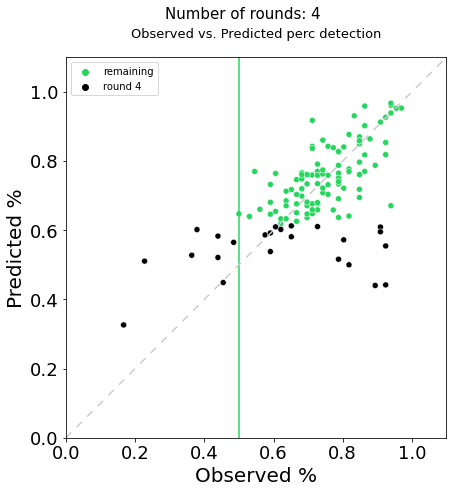

In [65]:
scatter_plot(images["preds"], images["y_test"], images, 4, colors)